# ETS Decomposition

ETS stands for Error-Trend-Seasionality.

ETS decomposition is the method to extract error (residues), trend and seasonal components from a time-series data.

# Seasonal Decomposition

## Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
airline_data = pd.read_csv("./airline_passengers.csv", index_col='Month', parse_dates=True)

In [5]:
airline_data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
airline_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

<AxesSubplot:title={'center':'Airline Passenger'}, xlabel='Month'>

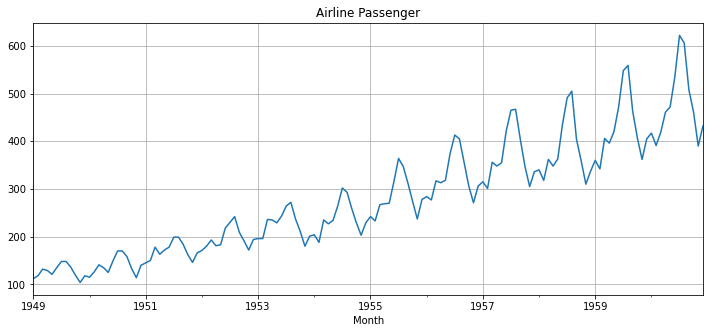

In [9]:
airline_data['Thousands of Passengers'].plot(figsize=(12,5), title="Airline Passenger", grid=True)

**Observations**

- The number of passengers travelling by airlines are increasing exponentially (there is a non-linear trend) 
- The data has a clear seasonal component. 
    - The peak in each year is happening during summer
    - The trough in each year is happening in winter
    - The data is seasonal with period = 1 year

## Seasonal Decompose

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline_data['Thousands of Passengers'], model='multiplicative') # because the data has non-linear trends

<IPython.core.display.Javascript object>


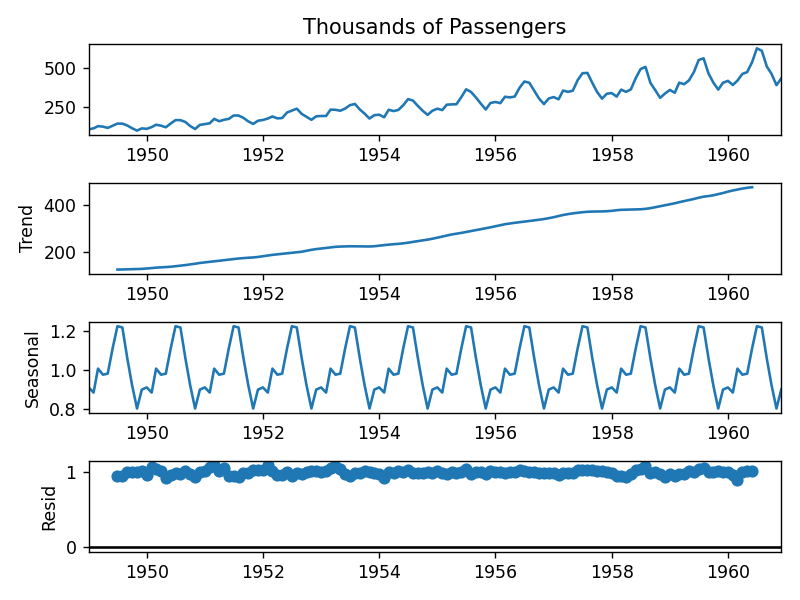

In [15]:
%matplotlib notebook
result.plot();

In [16]:
# let's check additive models too

result_add = seasonal_decompose(airline_data['Thousands of Passengers'], model='additive')

<IPython.core.display.Javascript object>


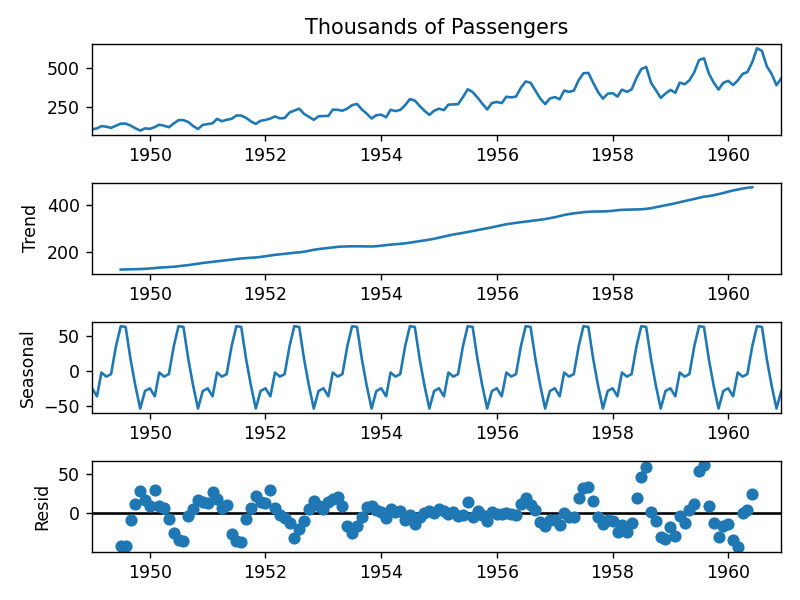

In [18]:
result_add.plot();

As we are using additive model over a dataset where non-linear trend is evident, we can see a higher residues in the seasonal decompose of additive model.

## Simple moving averages

In [21]:
airline_data['SMA-6'] = airline_data['Thousands of Passengers'].rolling(window=6).mean()

airline_data['SMA-12'] = airline_data['Thousands of Passengers'].rolling(window=12).mean()

In [23]:
airline_data.head(20)

,Thousands of Passengers,SMA-6,SMA-12
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


<IPython.core.display.Javascript object>


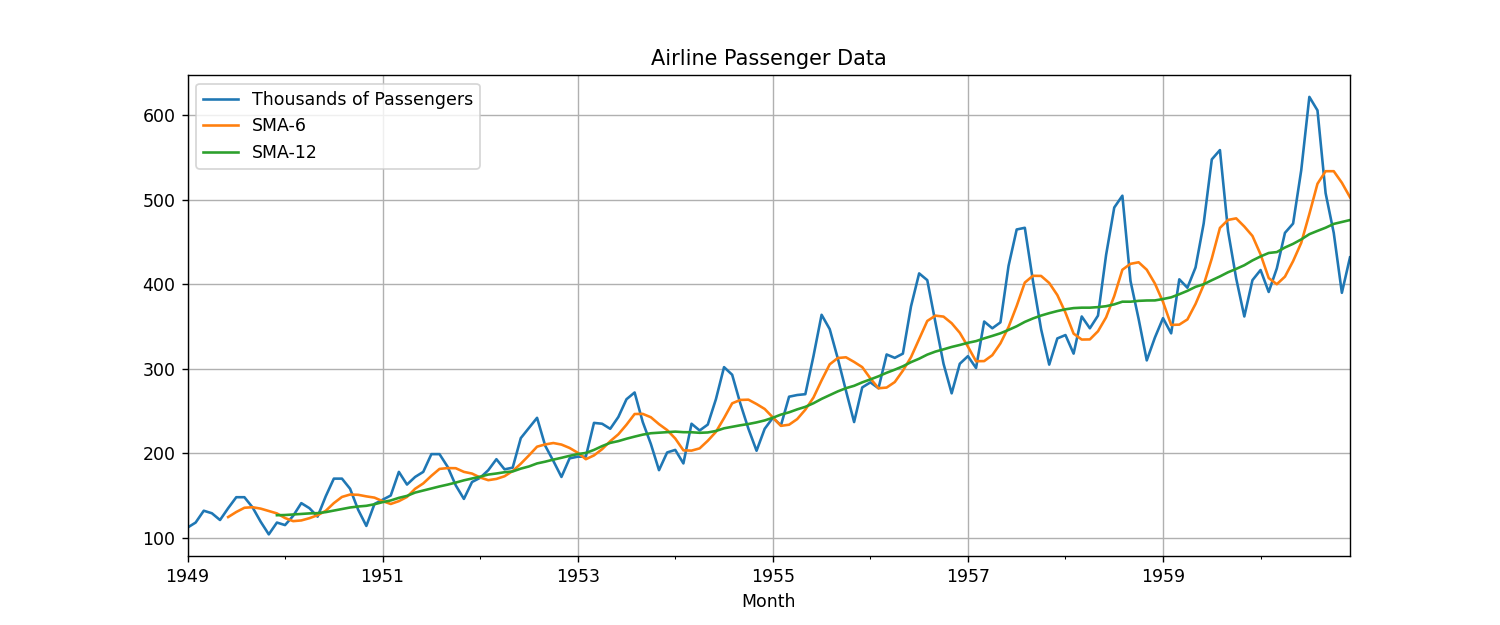

<AxesSubplot:title={'center':'Airline Passenger Data'}, xlabel='Month'>

In [25]:
airline_data.plot(figsize=(12,5), grid=True, title='Airline Passenger Data')

## Exponentially weighted moving average (EWMA)

We will use [pandas.DataFrame.ewm()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) method to calculate EWMA of a time series data.

This method has a boolean parameter called 'adjust'.

if *adjust = True* then:

$$y_t = \frac{x_t+(1-\alpha)x_{t-1}+(1-\alpha)^2x_{t-2}+(1-\alpha)^3x_{t-3}+...+(1-\alpha)^tx_{0}}{1+(1-\alpha)+(1-\alpha)^2+(1-\alpha)^3+...+(1-\alpha)^t} = \frac{\sum_{i=0}^{t}(1-\alpha)^i x_{t-i}}{\sum_{i=0}^{t}(1-\alpha)^i}$$

if *adjust = False* then:

$$ y_0 = x_0, \newline y_t = (1-\alpha)y_{t-1} + \alpha x_t $$


$\alpha$ is called the smoothing parameter. The value of $\alpha$ lies between 0 and 1. $[0 \leq \alpha \leq 1]$

In [29]:
airline_data['EWMA-adj-False'] = airline_data['Thousands of Passengers'].ewm(alpha=0.75, adjust=False).mean()

airline_data['EWMA-adj-True'] = airline_data['Thousands of Passengers'].ewm(alpha=0.75, adjust= True).mean()

<IPython.core.display.Javascript object>


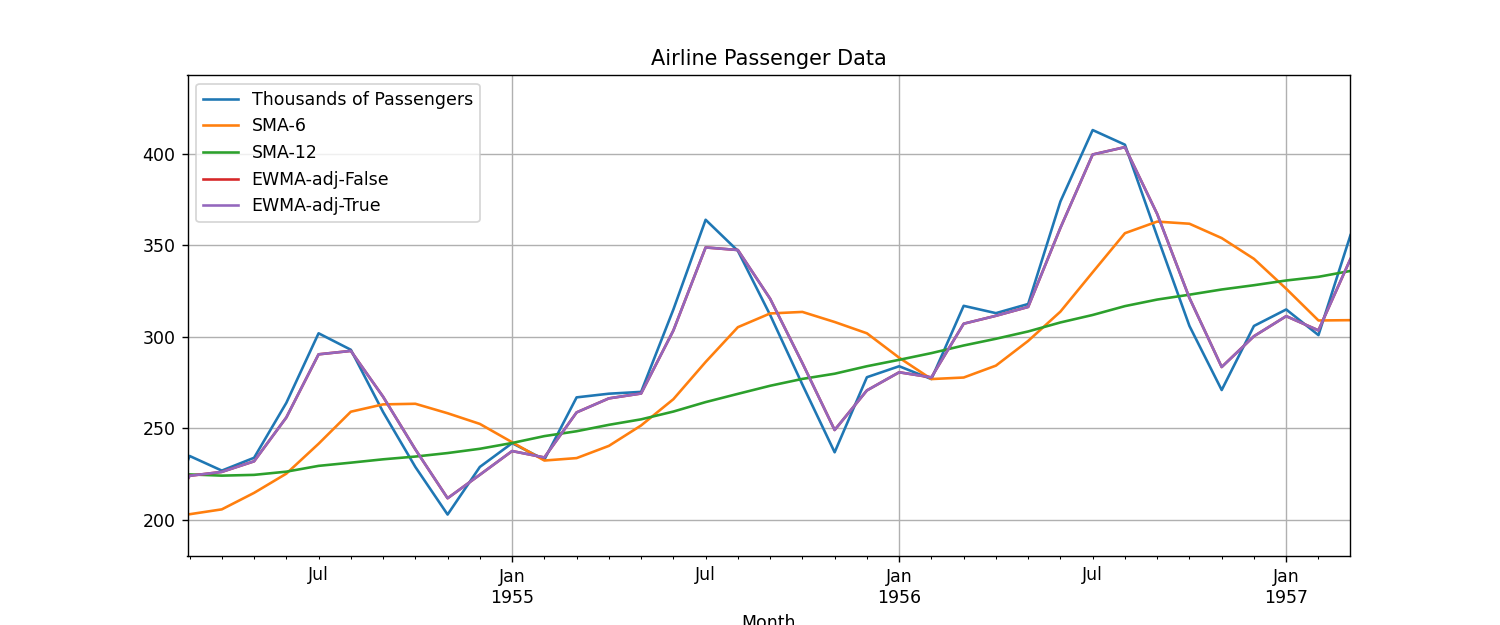

<AxesSubplot:title={'center':'Airline Passenger Data'}, xlabel='Month'>

In [30]:
airline_data.plot(figsize=(12,5), grid=True, title='Airline Passenger Data')

EWMA with adj=True and EWMA with adj = False don't have much diffenrences in values.

In [31]:
airline_data.head(20)

,Thousands of Passengers,SMA-6,SMA-12,EWMA-adj-False,EWMA-adj-True
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,116.500000,116.800000
1949-03-01,132,NaN,NaN,128.125000,128.380952
1949-04-01,129,NaN,NaN,128.781250,128.847059
1949-05-01,121,NaN,NaN,122.945312,122.956012
1949-06-01,135,124.500000,NaN,131.986328,131.991209
1949-07-01,148,130.500000,NaN,143.996582,143.998535
1949-08-01,148,135.500000,NaN,146.999146,146.999680
1949-09-01,136,136.166667,NaN,138.749786,138.749888
